In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import zipfile

# Path to your dataset zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/honeybeeSeg/HoneyBee.v3i.yolov8.zip'  # Change this path

# Directory where you want to extract the dataset
extract_dir = '/content'

# Unzipping the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Check if files are extracted
print("Files extracted to:", os.listdir(extract_dir))

Files extracted to: ['.config', 'valid', 'README.roboflow.txt', 'test', 'train', 'drive', 'README.dataset.txt', 'data.yaml', 'sample_data']


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 24.4 MB/s eta 0:00:00


In [ ]:
# data_yaml = """
# train: /content/train  # Path to training images
# val: /content/valid      # Path to validation images

# nc: 2  # Number of classes
# names: ['eggs', 'larves']  # List of class names
# """

# # Writing to a YAML file
# with open('/content/data.yaml', 'w') as file:
#     file.write(data_yaml)

In [4]:
from ultralytics import YOLO

# Load the YOLOv8 segmentation model
model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.74M/6.74M [00:00<00:00, 137MB/s]


In [5]:
# Train the model
model.train(
    data='/content/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='yolov8_custom_seg'
)

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_custom_seg, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 18.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 120MB/s]


AMP: checks passed ✅


/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /content/train/labels... 960 images, 6 backgrounds, 0 corrupt: 100%|██████████| 960/960 [00:00<00:00, 1573.88it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/valid/labels... 121 images, 0 backgrounds, 0 corrupt: 100%|██████████| 121/121 [00:00<00:00, 1253.04it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/segment/yolov8_custom_seg/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/yolov8_custom_seg
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.83G     0.7478      1.877      1.498      1.202         43        640: 100%|██████████| 60/60 [00:37<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        121        121      0.998          1      0.995      0.822      0.998          1      0.995      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.79G     0.6414     0.7977     0.8084      1.099         56        640: 100%|██████████| 60/60 [00:24<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        121        121      0.999          1      0.995      0.869      0.999          1      0.995      0.954



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.76G     0.6776     0.7906     0.6997      1.118         58        640: 100%|██████████| 60/60 [00:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        121        121       0.99          1      0.995      0.892       0.99          1      0.995       0.96



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.76G     0.6246     0.7119     0.5974      1.084         47        640: 100%|██████████| 60/60 [00:22<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        121        121      0.996          1      0.995      0.836      0.996          1      0.995      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.74G     0.5963     0.6991     0.5188      1.071         51        640: 100%|██████████| 60/60 [00:24<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        121        121       0.96      0.982      0.989      0.872       0.96      0.982      0.989      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.76G       0.58     0.7473     0.4809      1.073         49        640: 100%|██████████| 60/60 [00:22<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        121        121      0.999          1      0.995      0.883      0.999          1      0.995      0.965



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.76G     0.5716     0.7019     0.4418      1.052         50        640: 100%|██████████| 60/60 [00:23<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        121        121      0.999          1      0.995       0.93      0.999          1      0.995      0.966



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.76G     0.5894     0.7102      0.448      1.069         47        640: 100%|██████████| 60/60 [00:22<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        121        121      0.999          1      0.995      0.907      0.999          1      0.995      0.962



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.78G     0.5718     0.7264     0.4186      1.055         48        640: 100%|██████████| 60/60 [00:22<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        121        121      0.966      0.941      0.991      0.888      0.966      0.941      0.991      0.944



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.76G     0.5269      0.628     0.4035      1.028         48        640: 100%|██████████| 60/60 [00:23<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        121        121      0.999          1      0.995      0.882      0.999          1      0.995      0.956



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.76G     0.5393     0.6352     0.3891      1.045         47        640: 100%|██████████| 60/60 [00:22<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        121        121      0.953      0.942      0.986      0.915      0.953      0.942      0.986      0.959



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.78G     0.5494     0.7113     0.4005      1.028         43        640: 100%|██████████| 60/60 [00:23<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        121        121       0.99      0.992      0.995      0.933       0.99      0.992      0.995      0.975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.76G     0.5469     0.6625     0.3773      1.049         48        640: 100%|██████████| 60/60 [00:22<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        121        121      0.999          1      0.995      0.814      0.999          1      0.995      0.957



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.76G     0.5412     0.6435     0.3795      1.041         43        640: 100%|██████████| 60/60 [00:22<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        121        121      0.999          1      0.995      0.938      0.999          1      0.995      0.973



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.76G     0.5306      0.662     0.3758      1.037         49        640: 100%|██████████| 60/60 [00:24<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        121        121      0.999          1      0.995       0.92      0.999          1      0.995      0.969



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.78G     0.5241     0.6182     0.3578      1.031         47        640: 100%|██████████| 60/60 [00:23<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        121        121      0.999          1      0.995      0.928      0.999          1      0.995      0.965



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.79G     0.5305      0.631     0.3691      1.036         46        640: 100%|██████████| 60/60 [00:25<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        121        121      0.815       0.76      0.902      0.776      0.815       0.76      0.902      0.812



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.76G     0.5351     0.6528     0.3751      1.036         54        640: 100%|██████████| 60/60 [00:22<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        121        121      0.999          1      0.995      0.926      0.999          1      0.995       0.98



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.76G     0.5302      0.672     0.3689      1.029         44        640: 100%|██████████| 60/60 [00:24<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        121        121      0.999          1      0.995       0.94      0.999          1      0.995      0.969



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.8G     0.5211     0.6529     0.3598      1.024         54        640: 100%|██████████| 60/60 [00:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        121        121      0.999          1      0.995      0.944      0.999          1      0.995      0.977



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50       2.8G     0.4988     0.6185     0.3309       1.02         57        640: 100%|██████████| 60/60 [00:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        121        121      0.999          1      0.995      0.936      0.999          1      0.995      0.977



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.76G     0.5013     0.6379     0.3414      1.029         45        640: 100%|██████████| 60/60 [00:23<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        121        121      0.997          1      0.995      0.929      0.997          1      0.995      0.964



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.76G     0.4935     0.6392     0.3348      1.005         47        640: 100%|██████████| 60/60 [00:21<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        121        121      0.999          1      0.995      0.932      0.999          1      0.995      0.976



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.79G     0.5048     0.5891      0.322      1.022         49        640: 100%|██████████| 60/60 [00:24<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        121        121      0.999          1      0.995      0.938      0.999          1      0.995      0.975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.76G     0.4947     0.6325      0.319      1.003         46        640: 100%|██████████| 60/60 [00:22<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        121        121      0.999          1      0.995      0.939      0.999          1      0.995      0.967



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.82G     0.4857     0.6026     0.3258      1.011         46        640: 100%|██████████| 60/60 [00:22<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all        121        121      0.999          1      0.995      0.939      0.999          1      0.995      0.972



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.79G     0.4874     0.6137     0.3222      1.014         44        640: 100%|██████████| 60/60 [00:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        121        121      0.999          1      0.995      0.939      0.999          1      0.995      0.976



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.76G     0.4715     0.5909      0.314      1.011         52        640: 100%|██████████| 60/60 [00:22<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        121        121      0.999          1      0.995      0.934      0.999          1      0.995      0.979



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.73G     0.4758     0.5807     0.3089      1.011         46        640: 100%|██████████| 60/60 [00:24<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        121        121      0.999          1      0.995      0.939      0.999          1      0.995      0.974



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.76G     0.4698     0.5463      0.307      1.009         50        640: 100%|██████████| 60/60 [00:22<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        121        121      0.987          1      0.995       0.95      0.987          1      0.995      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.75G     0.4722     0.5543     0.3112       1.01         43        640: 100%|██████████| 60/60 [00:23<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        121        121      0.996          1      0.995      0.937      0.996          1      0.995      0.973



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.76G     0.4808     0.6059     0.3122      1.009         41        640: 100%|██████████| 60/60 [00:22<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        121        121          1          1      0.995      0.914          1          1      0.995      0.947



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.73G      0.452     0.5437     0.2947     0.9921         50        640: 100%|██████████| 60/60 [00:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        121        121      0.999          1      0.995      0.945      0.999          1      0.995      0.972



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.76G     0.4706      0.555     0.3151      1.007         50        640: 100%|██████████| 60/60 [00:23<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        121        121      0.999          1      0.995      0.946      0.999          1      0.995      0.977



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.76G     0.4608     0.5499     0.2982     0.9998         44        640: 100%|██████████| 60/60 [00:22<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        121        121          1          1      0.995      0.939          1          1      0.995      0.972



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.76G     0.4675     0.5527     0.3007      1.003         48        640: 100%|██████████| 60/60 [00:23<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        121        121      0.999          1      0.995      0.938      0.999          1      0.995      0.975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.74G     0.4485     0.5635     0.2899     0.9913         44        640: 100%|██████████| 60/60 [00:22<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        121        121      0.999      0.992      0.995       0.94      0.999      0.992      0.995      0.969



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.81G      0.449     0.5796     0.2943     0.9895         52        640: 100%|██████████| 60/60 [00:21<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        121        121      0.999          1      0.995      0.955      0.999          1      0.995      0.976



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.76G     0.4483     0.5358     0.2893     0.9864         43        640: 100%|██████████| 60/60 [00:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        121        121      0.999          1      0.995      0.952      0.999          1      0.995      0.975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.76G      0.439     0.5284     0.2804     0.9925         54        640: 100%|██████████| 60/60 [00:22<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        121        121      0.999      0.992      0.995      0.944      0.999      0.992      0.995      0.972


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.78G      0.399      0.565     0.4107     0.9618         16        640: 100%|██████████| 60/60 [00:26<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all        121        121      0.992      0.999      0.995      0.935      0.992      0.999      0.995      0.973



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.69G     0.3992     0.5682     0.3977      0.972         16        640: 100%|██████████| 60/60 [00:21<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        121        121      0.999      0.992      0.995      0.949      0.999      0.992      0.995      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.69G     0.3915     0.5754     0.3884     0.9605         16        640: 100%|██████████| 60/60 [00:21<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        121        121      0.998      0.992      0.995      0.949      0.998      0.992      0.995      0.975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.74G     0.3536      0.489     0.3634     0.9501         17        640: 100%|██████████| 60/60 [00:22<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        121        121      0.999      0.992      0.995      0.951      0.999      0.992      0.995      0.975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.69G     0.3525     0.5035     0.3462     0.9318         16        640: 100%|██████████| 60/60 [00:21<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        121        121      0.998      0.992      0.995       0.95      0.998      0.992      0.995       0.97



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.69G     0.3578      0.546     0.3521     0.9351         17        640: 100%|██████████| 60/60 [00:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        121        121      0.999      0.992      0.995      0.961      0.999      0.992      0.995       0.98



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.69G     0.3598      0.524     0.3515     0.9461         17        640: 100%|██████████| 60/60 [00:21<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        121        121      0.998      0.992      0.995      0.957      0.998      0.992      0.995      0.975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.69G     0.3592     0.5359     0.3438      0.924         15        640: 100%|██████████| 60/60 [00:22<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        121        121      0.998      0.992      0.995      0.958      0.998      0.992      0.995      0.974



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.69G     0.3386     0.5023      0.331     0.9281         16        640: 100%|██████████| 60/60 [00:21<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        121        121      0.998      0.992      0.995      0.952      0.998      0.992      0.995      0.976



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.69G     0.3151      0.494     0.3052     0.9228         16        640: 100%|██████████| 60/60 [00:21<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        121        121      0.998      0.992      0.995      0.948      0.998      0.992      0.995      0.975



50 epochs completed in 0.361 hours.
Optimizer stripped from runs/segment/yolov8_custom_seg/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/yolov8_custom_seg/weights/best.pt, 6.8MB

Validating runs/segment/yolov8_custom_seg/weights/best.pt...
Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.29s/it]


                   all        121        121      0.999      0.992      0.995      0.962      0.999      0.992      0.995       0.98
                larves        121        121      0.999      0.992      0.995      0.962      0.999      0.992      0.995       0.98
Speed: 0.8ms preprocess, 4.3ms inference, 0.0ms loss, 7.4ms postprocess per image
Results saved to runs/segment/yolov8_custom_seg


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a9008572140>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [6]:
# Evaluate the trained model
metrics = model.val()
print(metrics)

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/valid/labels.cache... 121 images, 0 backgrounds, 0 corrupt: 100%|██████████| 121/121 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]


                   all        121        121      0.999      0.992      0.995      0.961      0.999      0.992      0.995       0.98
                larves        121        121      0.999      0.992      0.995      0.961      0.999      0.992      0.995       0.98
Speed: 1.3ms preprocess, 16.2ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs/segment/yolov8_custom_seg2
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a90081a1930>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,

In [7]:
# Save the model to Google Drive
model.save('/content/drive/MyDrive/honeybeeSeg/yolov8_custom_seg03.pt')

In [8]:
# Evaluate the model
metrics = model.val()

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/valid/labels.cache... 121 images, 0 backgrounds, 0 corrupt: 100%|██████████| 121/121 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]


                   all        121        121      0.999      0.992      0.995      0.961      0.999      0.992      0.995       0.98
                larves        121        121      0.999      0.992      0.995      0.961      0.999      0.992      0.995       0.98
Speed: 0.4ms preprocess, 7.1ms inference, 0.0ms loss, 8.1ms postprocess per image
Results saved to runs/segment/yolov8_custom_seg3


In [9]:
print("Performance Metrics:")
for key, value in metrics.results_dict.items():  # Access results_dict as an attribute
    print(f"{key}: {value:.4f}")

Performance Metrics:
metrics/precision(B): 0.9987
metrics/recall(B): 0.9917
metrics/mAP50(B): 0.9950
metrics/mAP50-95(B): 0.9615
metrics/precision(M): 0.9987
metrics/recall(M): 0.9917
metrics/mAP50(M): 0.9950
metrics/mAP50-95(M): 0.9797
fitness: 1.9461


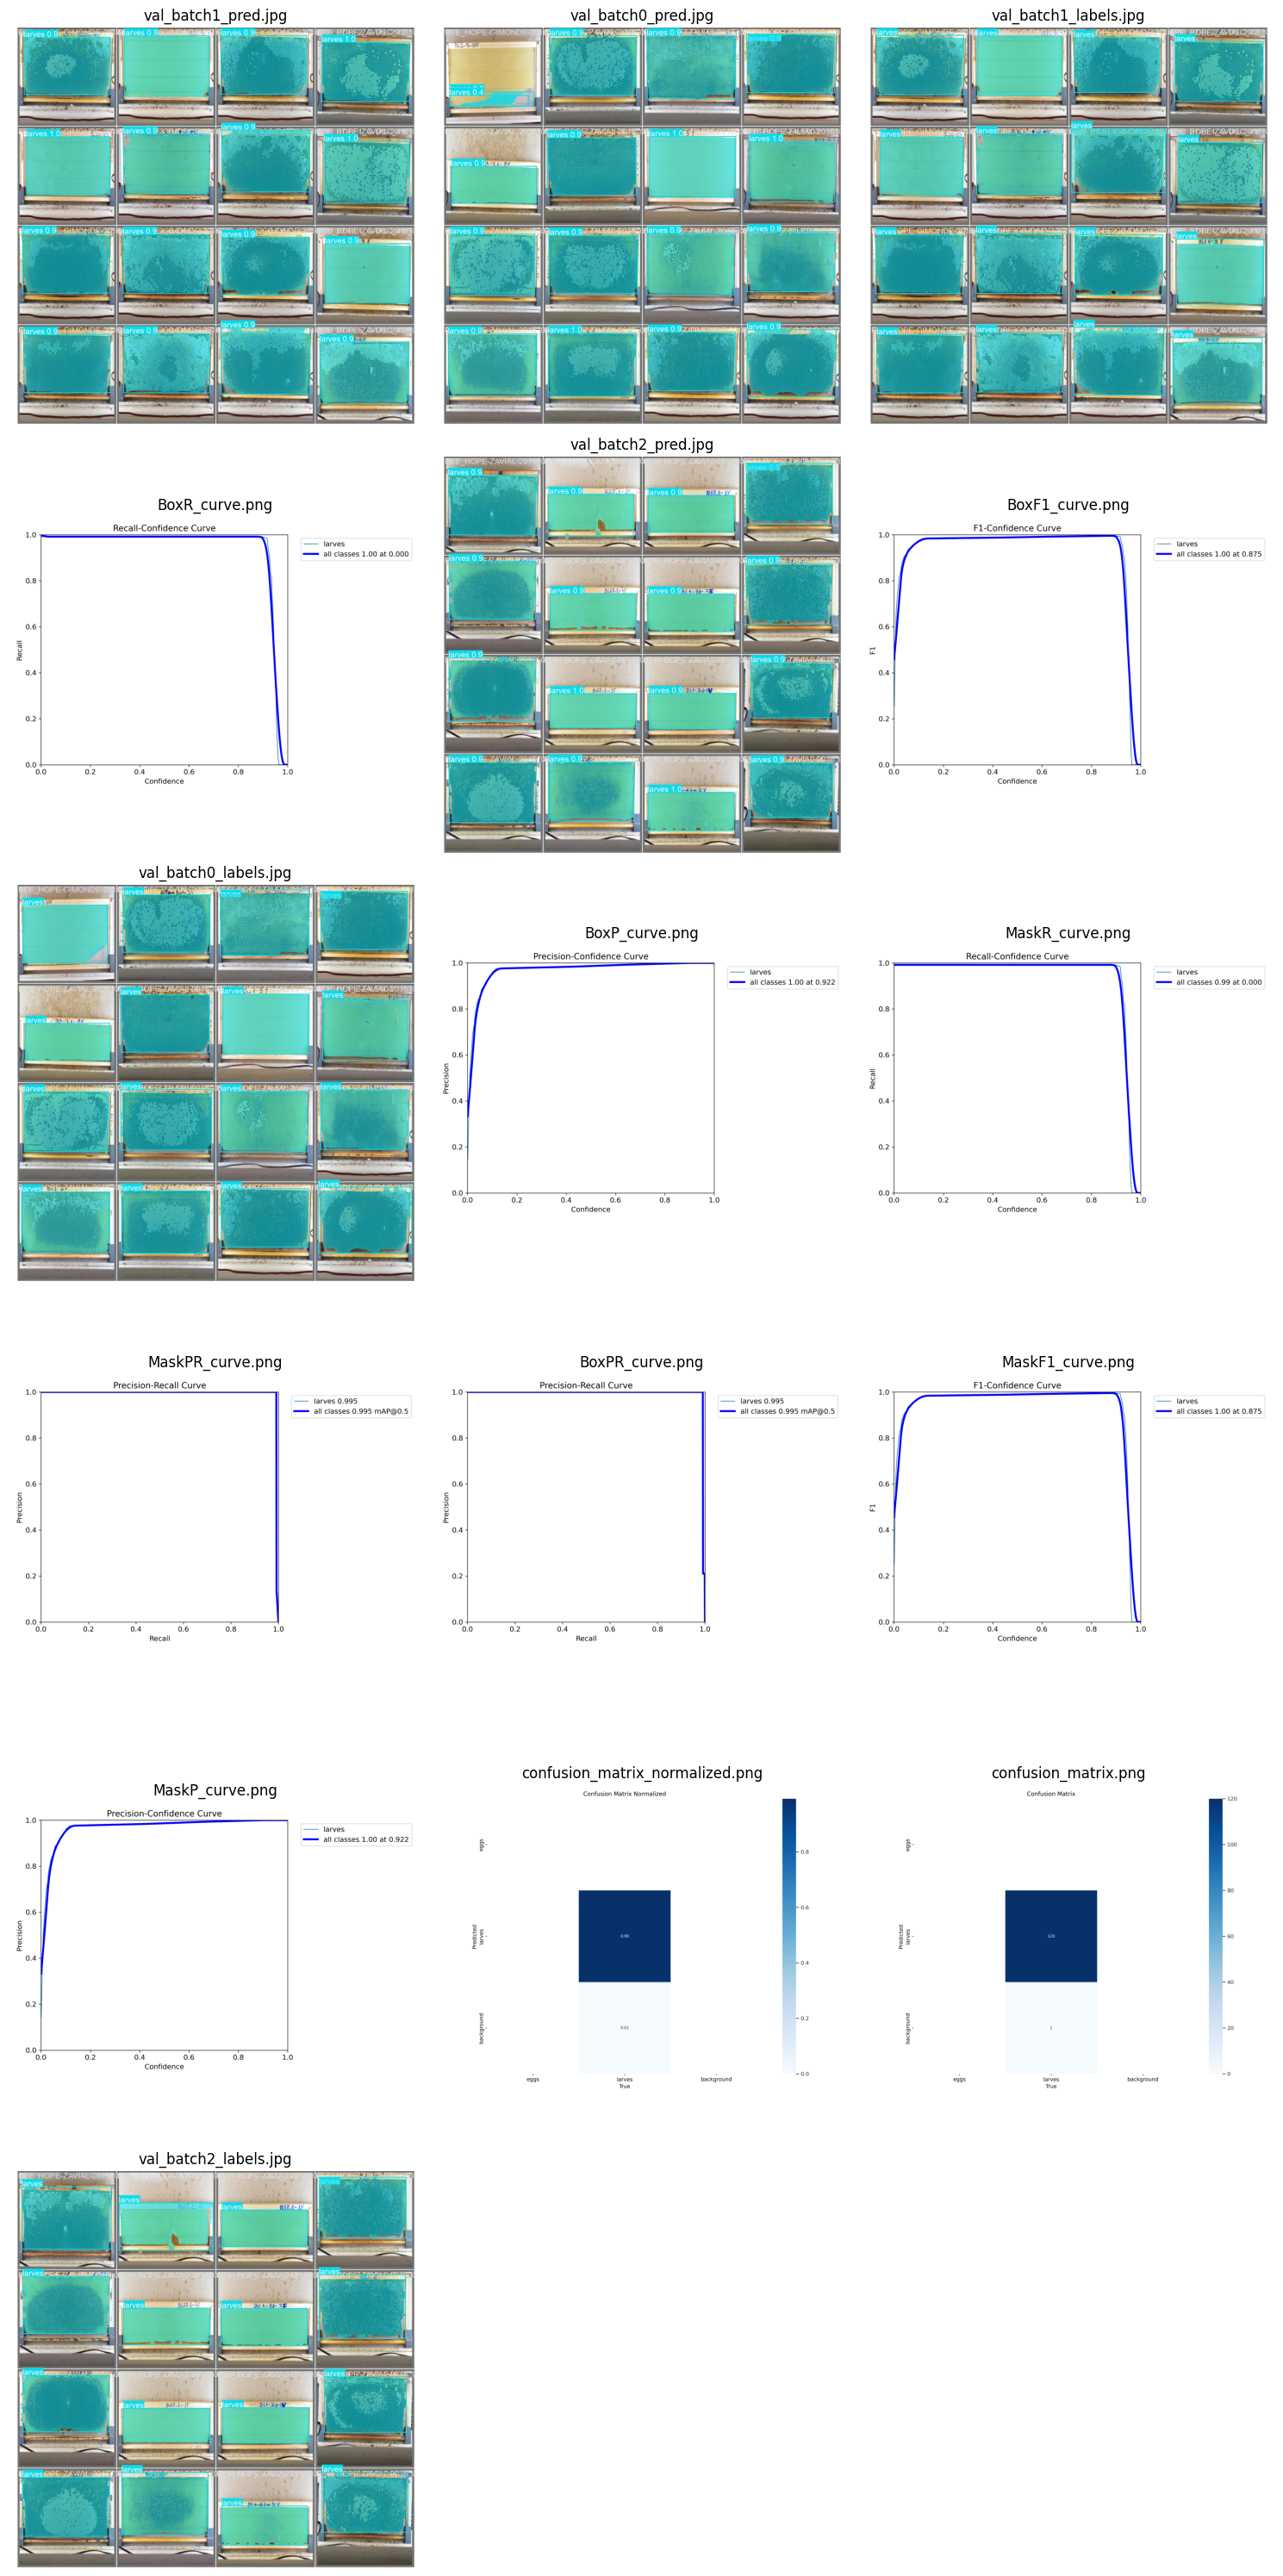

In [10]:
import os
import cv2
import matplotlib.pyplot as plt

def display_segmented_outputs_as_subplots(results_dir, columns=3, image_size=(10, 10)):
    """
    This function displays the segmented images saved in the results directory as subplots.

    :param results_dir: Path to the directory containing the segmented images
    :param columns: Number of columns in the subplot grid
    :param image_size: Size of each subplot image
    """
    # Get a list of image files in the results directory
    image_files = [f for f in os.listdir(results_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Determine the number of rows based on the number of images
    rows = (len(image_files) + columns - 1) // columns

    # Create a subplot figure
    fig, axes = plt.subplots(rows, columns, figsize=(columns * image_size[0], rows * image_size[1]))

    # Flatten axes for easy iteration
    axes = axes.flatten()

    # Display each segmented image in a subplot
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(results_dir, image_file)

        # Load the image using OpenCV
        image = cv2.imread(image_path)

        # Convert BGR (OpenCV default) to RGB for correct color display
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the image on the corresponding subplot axis
        axes[i].imshow(image_rgb)
        axes[i].set_title(f"{image_file}")
        axes[i].axis('off')  # Hide axes

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage
display_segmented_outputs_as_subplots('/content/runs/segment/yolov8_custom_seg3', columns=3, image_size=(5, 5))



image 1/1 /content/images (1).jpeg: 416x640 2 larvess, 84.6ms
Speed: 11.2ms preprocess, 84.6ms inference, 4.4ms postprocess per image at shape (1, 3, 416, 640)


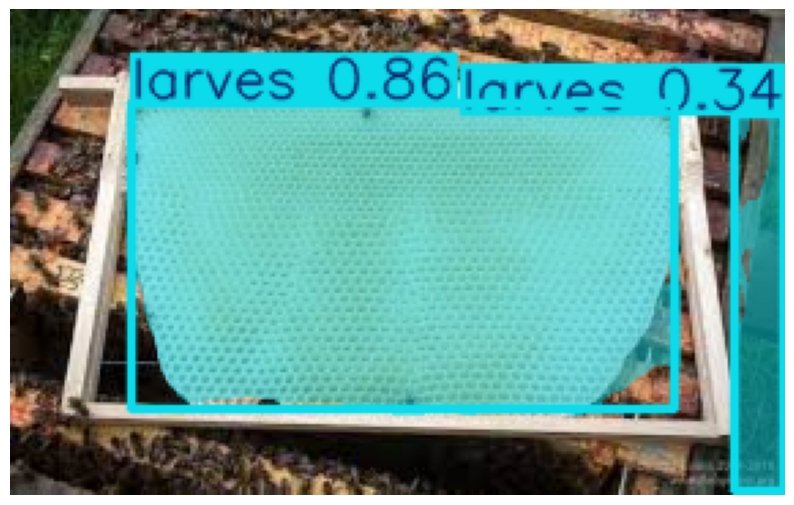

In [14]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the YOLOv8 segmentation model
model = YOLO('/content/drive/MyDrive/honeybeeSeg/yolov8_custom_seg03.pt')  # Replace with your model path

def segment_image(image_path):
    # Perform segmentation
    results = model.predict(source=image_path, save=False)

    # Extract the segmented image
    segmented_image = results[0].plot()

    # Convert the image from BGR to RGB for matplotlib
    segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

    # Display the segmented image
    plt.figure(figsize=(10, 10))
    plt.imshow(segmented_image_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage
segment_image('/content/images (1).jpeg')  # Replace with the path to your image

In [ ]:
'''
Summary:

- model is performing exceptionally well, with near-perfect precision and recall.
- The high mAP50 and mAP50-95 values indicate that the model is very accurate in detecting and segmenting the objects in both the "B" and "M" classes.
- The fitness score reinforces that model is well-balanced and effective.

'''